In [1]:
import os
from pathlib import Path
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

Move files for easier access

In [8]:
# path = Path(os.getcwd() + "\Datasets\ADNI\ADNI1 Complete 1Yr 1.5T")
path = Path(os.getcwd() + "\Datasets\SegmMaskTest\ADNI")
patients_count = 0
images_count = 0
for source_dir in path.iterdir():
    patients_count = patients_count + 1
    # print(source_dir)
    patient_id = source_dir.parts[-1]
    nii_files = source_dir.glob("**/*.nii")
    for nii_file in nii_files:
        images_count = images_count + 1
        relative_path = nii_file.relative_to(source_dir)
        print(relative_path.parts)
        if len(relative_path.parts) < 3:
            continue
        I_count = relative_path.parts[2]
        destination_dir = source_dir
        # destination_dir.mkdir(parents=True, exist_ok=True)
        destination_file = destination_dir / f"{relative_path.parts[0]}_{I_count}.nii"
        print(destination_file)
        nii_file.rename(destination_file)
print(f"patients count = {patients_count} \t images count = {images_count}")

('HarP_135_final_release_2015_I474728.nii',)
('HHP_6_DOF_AC-PC_registered_MPRAGE_I387726.nii',)
('MPR-R__GradWarp_I45114.nii',)
('MPR-R__GradWarp__B1_Correction_I45113.nii',)
('MPR-R__GradWarp__B1_Correction__Mask_I45111.nii',)
('MPR-R__GradWarp__B1_Correction__N3_I45112.nii',)
('MPR__GradWarp_I45110.nii',)
('MPR__GradWarp__B1_Correction_I45109.nii',)
('MPR__GradWarp__B1_Correction__Mask_I45106.nii',)
('MPR__GradWarp__B1_Correction__N3_I45107.nii',)
('MPR__GradWarp__B1_Correction__N3__Scaled_2_I118671.nii',)
('MPR__GradWarp__B1_Correction__N3__Scaled_I45108.nii',)
patients count = 1 	 images count = 12


In [7]:
csv_files = path.glob("**/*.csv")
for csv_file in csv_files:
    csv_data = csv_file
df = pd.read_csv(csv_data)
df.head()

d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI


NameError: name 'csv_data' is not defined

In [9]:
subjects = df["Subject"].sort_values()
#print(subjects)
#print(path)

for subject in subjects[:1]:
    #print(subject) 
    images = df[df["Subject"] == subject]["Image Data ID"].sort_values()
    #print(images)
    # for image in images:
    #     if os.path.exists(f"{path}/{subject}/{image}.nii") == True:
    #         print("lol")

    for image_path in Path(path / subject).glob("**/*.nii"):
        test_load = nib.load(image_path)
        test_load = test_load.get_fdata()

        print(test_load.shape, subject)

        test = test_load[:, :, 130]
        
        #plt.imshow(test)
        #plt.show()
        # Get dimensions of the data array
        z_dim, y_dim, x_dim = test_load.shape

        # Plot all slices
        #fig, axes = plt.subplots(3, z_dim - z_dim + 5, figsize=(z_dim - z_dim + 5, 9))

        # Plot sagittal slices (y-z plane)
        for i in range(45, 200, 5):
            sag_slice = test_load[i, :, :]
            plt.imshow(sag_slice.T, cmap='gray', origin='lower')
            plt.title(f'Sagittal Slice {i}')
            plt.show()

        # Plot axial slices (x-y plane)
        for i in range(45, 160, 5):
           ax_slice = test_load[:, :, i]
           plt.imshow(ax_slice.T, cmap='gray', origin='lower')
           plt.title(f'Axial Slice {i}')
           plt.show()

        # Plot coronal slices (x-z plane)
        for i in range(45, 200, 5):
           cor_slice = test_load[:, i, :]
           plt.imshow(cor_slice.T, cmap='gray', origin='lower')
           plt.title(f'Coronal Slice {i}')
           plt.show()

        plt.show()

NameError: name 'df' is not defined

d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI\002_S_0295\MPR-R__GradWarp__B1_Correction__N3_I45112.nii (256, 256, 166) 002_S_0295


ValueError: '' is not a valid value for origin; supported values are 'upper', 'lower'

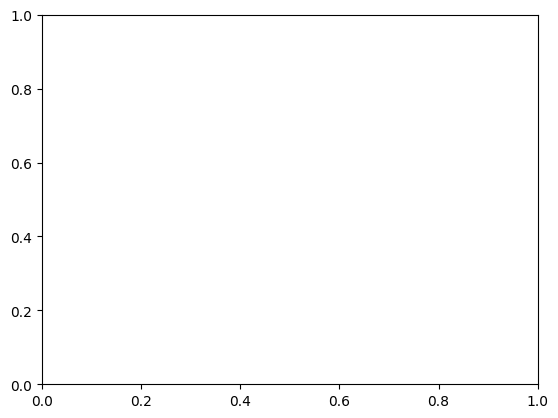

In [10]:
# subjects = df["Subject"].sort_values()
#print(subjects)
# print(path)


# for subject in subjects[:1]:
#     #print(subject) 
#     images = df[df["Subject"] == subject]["Image Data ID"].sort_values()
#     #print(images)
#     # for image in images:
#     #     if os.path.exists(f"{path}/{subject}/{image}.nii") == True:
#     #         print("lol")

subject = "002_S_0295"
# !1-3
for image_path in Path(path / subject).glob("*Correction__N3*.nii"):
    test_load = nib.load(image_path)
    test_load = test_load.get_fdata()

    print(image_path, test_load.shape, subject)
    # lol
    image = image_path.parts[-1].strip().split("_")[-1].split(".")[0]
    # print(image)
    segm_mask_paths = Path(path / subject).glob(f"*Mask*.nii")
    for segm_mask_path in segm_mask_paths:
        # print(segm_mask_path)
        segm_load = nib.load(segm_mask_path).get_fdata()
        test = segm_load[:, :, 130]
    
        # plt.imshow(test)
        #plt.show()
        # Get dimensions of the data array
        z_dim, y_dim, x_dim = segm_load.shape

        # Plot all slices
        # fig, axes = plt.subplots(3, z_dim - z_dim + 5, figsize=(z_dim - z_dim + 5, 9))

        # Plot sagittal slices (y-z plane)
        for i in range(80, 81, 5):
            sag_slice = segm_load[i, :, :]
            # print(sag_slice )
            # plt.imshow(sag_slice.T, cmap='gray', origin='lower')
            # plt.title(f'Sagittal Slice {i}')
            # plt.show()

    sag_slice_mask = segm_load[80, :, :].T

    #plt.imshow(test)
    #plt.show()
    # Get dimensions of the data array
    z_dim, y_dim, x_dim = test_load.shape

    # Plot all slices
    # fig, axes = plt.subplots(3, z_dim - z_dim + 5, figsize=(z_dim - z_dim + 5, 9))

    # Plot sagittal slices (y-z plane)
    # for i in range(80, 81, 5):
    #     sag_slice = test_load[:, :, i]
    #     plt.imshow(sag_slice.T, cmap='gray', origin='lower')
    #     plt.title(f'Sagittal Slice {i}')
    #     plt.show()
    sag_slice = test_load[:, :, 80].T

    sag_slice[sag_slice_mask == 0] = 0
    plt.imshow(sag_slice, cmap='gray', origin='')


    # # # Plot axial slices (x-y plane)
    # for i in range(45, 46, 5):
    #    ax_slice = test_load[:, :, i]
    #    plt.imshow(ax_slice.T, cmap='gray', origin='lower')
    #    plt.title(f'Axial Slice {i}')
    #    plt.show()

    # # # Plot coronal slices (x-z plane)
    # for i in range(80, 81, 5):
    #    cor_slice = test_load[:, i, :]
    #    plt.imshow(cor_slice.T, cmap='gray', origin='lower')
    #    plt.title(f'Coronal Slice {i}')
    #    plt.show()

    plt.show()

d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI\002_S_0295\MPR__GradWarp__B1_Correction__Mask_I45106.nii
d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI\002_S_0295\MPR__GradWarp__B1_Correction_I45109.nii
<class 'numpy.memmap'>
(256, 256, 166) (256, 256, 166)


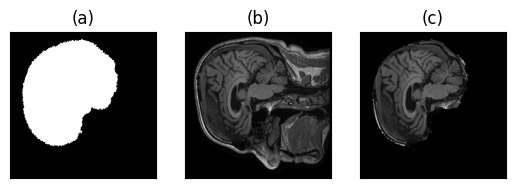

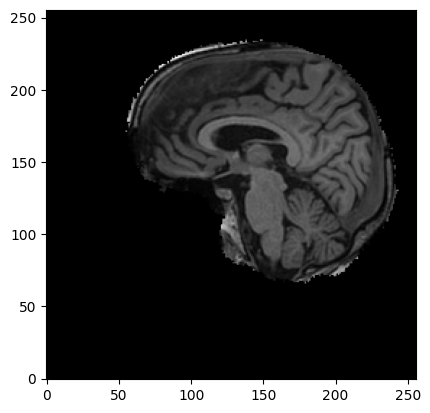

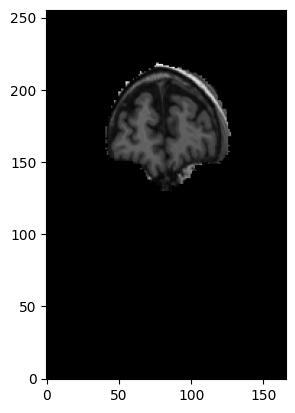

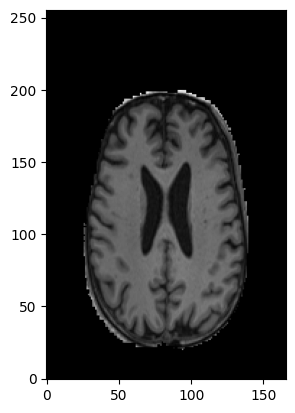

d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI\002_S_0295\MPR-R__GradWarp__B1_Correction__Mask_I45111.nii
d:\Facultate\anul_3\ELL\Code\Datasets\SegmMaskTest\ADNI\002_S_0295\MPR-R__GradWarp__B1_Correction_I45113.nii
<class 'numpy.memmap'>
(256, 256, 166) (256, 256, 166)


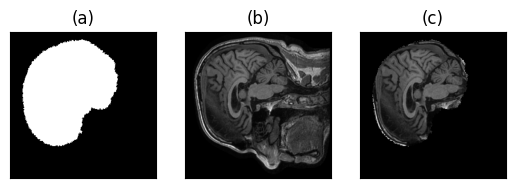

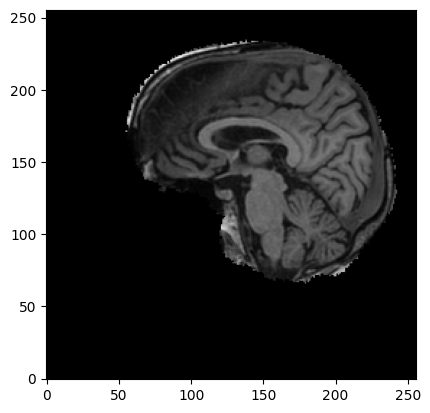

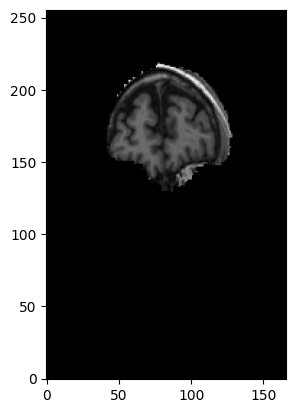

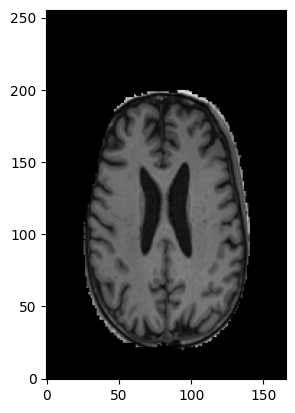

In [11]:
subject = "002_S_0295"
path = Path(os.path.join(os.getcwd(), "Datasets", "SegmMaskTest", "ADNI"))
subject_path = path / subject

mpr_types = [
    "MPR", 
    "MPR-R",
]

def open_and_apply_mask(subject_path : Path , mpr_type: str, slice=None) -> np.ndarray:
    '''
    subject_path - path of a subject \n
    mpr_type - which type of mpr to be considered

    Function takes the full path of the subject directory and the type of mpr, opens the
    unprocessed .nii file and its corresponding mask and returns the resulting array after
    applying the segmentation mask.
    '''
    mask_path = list(subject_path.glob(f"*{mpr_type}__*Mask*.nii"))[0] # have transform to list, .glob() is not iterable
    image_path = list(subject_path.glob(f"*{mpr_type}__*_Correction_I*.nii"))[0] # have transform to list, .glob() is not iterable
    print(mask_path)
    print(image_path)

    mask_arr = nib.load(mask_path).get_fdata()
    image_arr = nib.load(image_path).get_fdata()

    print(type(mask_arr))

    mask_arr = np.transpose(mask_arr, (2, 1, 0))
    segmented_arr = image_arr.copy()
    
    print(mask_arr.shape, image_arr.shape)

    for i in range(mask_arr.shape[2]): # Mask and image have different orientations
        mask_arr[:, :, i] = np.rot90(mask_arr[:, :, i], k=2)

    segmented_arr[mask_arr == 0] = 0

    mask_slice = mask_arr[:, :, 80]
    image_slice = image_arr[:, :, 80]
    segmented_slice = segmented_arr[:, :, 80]

    fig, axes = plt.subplots(1, 3)

    plt.xticks([])  # Hide x axis ticks and labels
    plt.yticks([])  # Hide y axis ticks and labels

    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    axes[0].imshow(mask_slice.T, cmap='gray', origin='lower')
    axes[0].set_title("(a)")
    #plt.show()
    axes[1].imshow(image_slice.T, cmap='gray', origin='lower')
    axes[1].set_title("(b)")
    #plt.show()
    axes[2].imshow(segmented_slice.T, cmap='gray', origin='lower')
    axes[2].set_title("(c)")
    plt.tight_layout
    plt.show()

    return segmented_arr


for mpr_type in mpr_types:
    segmented_arr = open_and_apply_mask(subject_path, mpr_type)
    sag_segmented_slice = segmented_arr[:, :, 80]
    plt.imshow(np.rot90(sag_segmented_slice.T, k=1), cmap='gray', origin='lower')
    plt.show()

    cor_segmented_slice = segmented_arr[:, 80, :]
    plt.imshow(np.rot90(cor_segmented_slice.T, k=1), cmap='gray', origin='lower')
    plt.show()

    ax_segmented_slice = segmented_arr[80, :, :]
    plt.imshow(np.rot90(ax_segmented_slice.T, k=1), cmap='gray', origin='lower')
    plt.show()
